# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import TweetTokenizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import learning_curve
from sklearn import *
from sklearn.svm import LinearSVC
from sklearn import svm

In [2]:
import numpy as np
import pandas as pd
tweets = pd.read_csv(r"C:\Users\lutaz\Downloads\fyp complete\fyp dataset\climatechangedata.csv") #remember to put the right file or directory path
list(tweets.columns.values)

['tweet_text']

In [3]:
pd.set_option('display.max_columns', None)
print(tweets)

                                             tweet_text
0     RT @jinnieeee_274: @strwberissa Here are the l...
1     RT @trsrupdates: â€œEveryday is Earth Day, let...
2     RT @walwrites_: Instead of using google, you c...
3     RT @sassiesahi: [ #LetTheEarthBreath ]\n\nhi, ...
4     RT @gyuubie: HOW TO SAVE MOTHER EARTH\nâ€¢save...
...                                                 ...
9239  RT @NRDC: "This decision comes when we can lea...
9240  RT @MikeHudema: #Denmark is building an artifi...
9241  Our event updates directly in your WhatsApp\nA...
9242  Children of the Marquesas Islands are inspirin...
9243  RT @OrbPlanet: Even if global heating can be k...

[9244 rows x 1 columns]


In [4]:
import re, nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
wordnet_lemmatizer = WordNetLemmatizer()

def normalizer(tweet):
    only_letters = re.sub("[^a-zA-Z]", " ",tweet) 
    tokens = nltk.word_tokenize(only_letters)[2:]
    lower_case = [l.lower() for l in tokens]
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case))
    lemmas = [wordnet_lemmatizer.lemmatize(t) for t in filtered_result]
    return lemmas

In [5]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt 

## Lowercasing all the tweets

In [6]:
df_clean =  pd.DataFrame()
df_clean['tweet_text'] = tweets.tweet_text.str.lower()
df_clean.head()

,tweet_text
0,rt @jinnieeee_274: @strwberissa here are the l...
1,"rt @trsrupdates: â€œeveryday is earth day, let..."
2,"rt @walwrites_: instead of using google, you c..."
3,"rt @sassiesahi: [ #lettheearthbreath ]\n\nhi, ..."
4,rt @gyuubie: how to save mother earth\nâ€¢save...


## Remove URL links and HTML reference characters

In [7]:
df_clean.tweet_text = df_clean.tweet_text.apply(lambda x: re.sub(r'https?:\/\/\S+', '', x))
df_clean.tweet_text.apply(lambda x: re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', x))
pd.set_option('display.max_columns', None)
print(df_clean)

                                             tweet_text
0     rt @jinnieeee_274: @strwberissa here are the l...
1     rt @trsrupdates: â€œeveryday is earth day, let...
2     rt @walwrites_: instead of using google, you c...
3     rt @sassiesahi: [ #lettheearthbreath ]\n\nhi, ...
4     rt @gyuubie: how to save mother earth\nâ€¢save...
...                                                 ...
9239  rt @nrdc: "this decision comes when we can lea...
9240  rt @mikehudema: #denmark is building an artifi...
9241  our event updates directly in your whatsapp\na...
9242  children of the marquesas islands are inspirin...
9243  rt @orbplanet: even if global heating can be k...

[9244 rows x 1 columns]


In [8]:
df_clean.tweet_text = df_clean.tweet_text.apply(lambda x: re.sub(r'&[a-z]+;', '', x))
def remove_URL(sample):
    """Remove URLs from a sample string"""
    return re.sub(r"http\S+", "", tweet_text)
pd.set_option('display.max_columns', None)
df_clean.head()

,tweet_text
0,rt @jinnieeee_274: @strwberissa here are the l...
1,"rt @trsrupdates: â€œeveryday is earth day, let..."
2,"rt @walwrites_: instead of using google, you c..."
3,"rt @sassiesahi: [ #lettheearthbreath ]\n\nhi, ..."
4,rt @gyuubie: how to save mother earth\nâ€¢save...


## Removing placeholders such as 'LINK', 'VIDEO'

In [9]:
df_clean.tweet_text = df_clean.tweet_text.apply(lambda x: re.sub(r'{link}', '', x))
df_clean.tweet_text = df_clean.tweet_text.apply(lambda x: re.sub(r"\[video\]", '', x))
pd.set_option('display.max_columns', None)
df_clean.head()

,tweet_text
0,rt @jinnieeee_274: @strwberissa here are the l...
1,"rt @trsrupdates: â€œeveryday is earth day, let..."
2,"rt @walwrites_: instead of using google, you c..."
3,"rt @sassiesahi: [ #lettheearthbreath ]\n\nhi, ..."
4,rt @gyuubie: how to save mother earth\nâ€¢save...


## Remove twitter handles (@user)

In [10]:
df_clean['tweet_text'] = np.vectorize(remove_pattern)(df_clean['tweet_text'], "@[\w]*")
df_clean['tweet_text'] = df_clean['tweet_text'].str.replace("[^a-z,A-Z#]", " ")     
df_clean['tweet_text'] = df_clean['tweet_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
df_clean['tweet_text'] = df_clean['tweet_text'].str.replace("#", " ") 
df_clean['tweet_text'] = df_clean.tweet_text.str.lower()
pd.set_option('display.max_columns', None)
df_clean.head()

C:\Users\lutaz\AppData\Local\Temp\ipykernel_17808\2231592293.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_clean['tweet_text'] = df_clean['tweet_text'].str.replace("[^a-z,A-Z#]", " ")


,tweet_text
0,here are the little things but has big help sa...
1,"everyday earth day, let restore our earth sci..."
2,"instead using google, you can use ecosia searc..."
3,"lettheearthbreath hi, everyone you can donate..."
4,how save mother earth save water save electric...


## Remove non letter characters

In [11]:
#remove non letter characters
df_clean.tweet_text = df_clean.tweet_text.apply(lambda x: re.sub(r"[^a-z\s\(\-:\)\\\/\];='#]", '', x))
pd.set_option('display.max_columns', None)
df_clean.head()

,tweet_text
0,here are the little things but has big help sa...
1,everyday earth day let restore our earth scie...
2,instead using google you can use ecosia search...
3,lettheearthbreath hi everyone you can donate ...
4,how save mother earth save water save electric...


## Remove stopwords

In [12]:
stop_words = stopwords.words('english')
df_clean['remove_short'] = df_clean['tweet_text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop_words)]))
pd.set_option('display.max_columns', None)
df_clean['remove_short'].head()

0    little things big help save earth lettheearthb...
1    everyday earth day let restore earth sciencepr...
2    instead using google use ecosia search app lik...
3    lettheearthbreath hi everyone donate plastic w...
4    save mother earth save water save electricity ...
Name: remove_short, dtype: object

## Tokenization

In [13]:
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
tknzr = TweetTokenizer()
df_clean['tokenized'] = df_clean['remove_short'].apply(tknzr.tokenize)
df_clean.head()

,tweet_text,remove_short,tokenized
0,here are the little things but has big help sa...,little things big help save earth lettheearthb...,"[little, things, big, help, save, earth, letth..."
1,everyday earth day let restore our earth scie...,everyday earth day let restore earth sciencepr...,"[everyday, earth, day, let, restore, earth, sc..."
2,instead using google you can use ecosia search...,instead using google use ecosia search app lik...,"[instead, using, google, use, ecosia, search, ..."
3,lettheearthbreath hi everyone you can donate ...,lettheearthbreath hi everyone donate plastic w...,"[lettheearthbreath, hi, everyone, donate, plas..."
4,how save mother earth save water save electric...,save mother earth save water save electricity ...,"[save, mother, earth, save, water, save, elect..."


## Tweets normalization

In [14]:
pd.set_option('display.max_colwidth', -1) # Setting this so we can see the full content of cells
df_clean['normalized_tweet'] = df_clean.remove_short.apply(normalizer)
df_clean.head()

C:\Users\lutaz\AppData\Local\Temp\ipykernel_17808\3996894703.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1) # Setting this so we can see the full content of cells


,tweet_text,remove_short,tokenized,normalized_tweet
0,here are the little things but has big help save the earth lettheearthbreath climatecrisis https,little things big help save earth lettheearthbreath climatecrisis https,"[little, things, big, help, save, earth, lettheearthbreath, climatecrisis, https]","[big, help, save, earth, lettheearthbreath, climatecrisis, http]"
1,everyday earth day let restore our earth scienceprotest lettheearthbreath climatechangeaw,everyday earth day let restore earth scienceprotest lettheearthbreath climatechangeaw,"[everyday, earth, day, let, restore, earth, scienceprotest, lettheearthbreath, climatechangeaw]","[day, let, restore, earth, scienceprotest, lettheearthbreath, climatechangeaw]"
2,instead using google you can use ecosia search app just like google but the difference for every search you,instead using google use ecosia search app like google difference every search,"[instead, using, google, use, ecosia, search, app, like, google, difference, every, search]","[google, use, ecosia, search, app, like, google, difference, every, search]"
3,lettheearthbreath hi everyone you can donate your plastic wastes here there are places where you can drop off,lettheearthbreath hi everyone donate plastic wastes places drop,"[lettheearthbreath, hi, everyone, donate, plastic, wastes, places, drop]","[everyone, donate, plastic, waste, place, drop]"
4,how save mother earth save water save electricity plant some trees unplug some uppliances delete emails reduce the,save mother earth save water save electricity plant trees unplug uppliances delete emails reduce,"[save, mother, earth, save, water, save, electricity, plant, trees, unplug, uppliances, delete, emails, reduce]","[earth, save, water, save, electricity, plant, tree, unplug, uppliances, delete, email, reduce]"


## Lemmatization

In [15]:
import nltk 
from nltk.corpus import wordnet  

df_clean['pos_tags'] = df_clean['normalized_tweet'].apply(nltk.tag.pos_tag)

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
df_clean['wordnet_pos'] = df_clean['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
wnl = WordNetLemmatizer()
df_clean['lemmatized'] = df_clean['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
df_clean.head()

,tweet_text,remove_short,tokenized,normalized_tweet,pos_tags,wordnet_pos,lemmatized
0,here are the little things but has big help save the earth lettheearthbreath climatecrisis https,little things big help save earth lettheearthbreath climatecrisis https,"[little, things, big, help, save, earth, lettheearthbreath, climatecrisis, https]","[big, help, save, earth, lettheearthbreath, climatecrisis, http]","[(big, JJ), (help, NN), (save, VB), (earth, JJ), (lettheearthbreath, JJ), (climatecrisis, NN), (http, NN)]","[(big, a), (help, n), (save, v), (earth, a), (lettheearthbreath, a), (climatecrisis, n), (http, n)]","[big, help, save, earth, lettheearthbreath, climatecrisis, http]"
1,everyday earth day let restore our earth scienceprotest lettheearthbreath climatechangeaw,everyday earth day let restore earth scienceprotest lettheearthbreath climatechangeaw,"[everyday, earth, day, let, restore, earth, scienceprotest, lettheearthbreath, climatechangeaw]","[day, let, restore, earth, scienceprotest, lettheearthbreath, climatechangeaw]","[(day, NN), (let, VB), (restore, VB), (earth, JJ), (scienceprotest, JJS), (lettheearthbreath, NN), (climatechangeaw, NN)]","[(day, n), (let, v), (restore, v), (earth, a), (scienceprotest, a), (lettheearthbreath, n), (climatechangeaw, n)]","[day, let, restore, earth, scienceprotest, lettheearthbreath, climatechangeaw]"
2,instead using google you can use ecosia search app just like google but the difference for every search you,instead using google use ecosia search app like google difference every search,"[instead, using, google, use, ecosia, search, app, like, google, difference, every, search]","[google, use, ecosia, search, app, like, google, difference, every, search]","[(google, NN), (use, NN), (ecosia, JJ), (search, NN), (app, NN), (like, IN), (google, NN), (difference, NN), (every, DT), (search, NN)]","[(google, n), (use, n), (ecosia, a), (search, n), (app, n), (like, n), (google, n), (difference, n), (every, n), (search, n)]","[google, use, ecosia, search, app, like, google, difference, every, search]"
3,lettheearthbreath hi everyone you can donate your plastic wastes here there are places where you can drop off,lettheearthbreath hi everyone donate plastic wastes places drop,"[lettheearthbreath, hi, everyone, donate, plastic, wastes, places, drop]","[everyone, donate, plastic, waste, place, drop]","[(everyone, NN), (donate, NN), (plastic, NN), (waste, NN), (place, NN), (drop, NN)]","[(everyone, n), (donate, n), (plastic, n), (waste, n), (place, n), (drop, n)]","[everyone, donate, plastic, waste, place, drop]"
4,how save mother earth save water save electricity plant some trees unplug some uppliances delete emails reduce the,save mother earth save water save electricity plant trees unplug uppliances delete emails reduce,"[save, mother, earth, save, water, save, electricity, plant, trees, unplug, uppliances, delete, emails, reduce]","[earth, save, water, save, electricity, plant, tree, unplug, uppliances, delete, email, reduce]","[(earth, NN), (save, VB), (water, NN), (save, VBP), (electricity, NN), (plant, NN), (tree, NN), (unplug, JJ), (uppliances, NNS), (delete, JJ), (email, NN), (reduce, VB)]","[(earth, n), (save, v), (water, n), (save, v), (electricity, n), (plant, n), (tree, n), (unplug, a), (uppliances, n), (delete, a), (email, n), (reduce, v)]","[earth, save, water, save, electricity, plant, tree, unplug, uppliances, delete, email, reduce]"


## Remove duplicates 

In [16]:
df_clean.drop_duplicates(inplace=True, subset="tweet_text")
df_clean.to_csv('cleaneddataset.csv', index = False,header=True)
pd.set_option('display.max_columns', None)
df_clean.head()

,tweet_text,remove_short,tokenized,normalized_tweet,pos_tags,wordnet_pos,lemmatized
0,here are the little things but has big help save the earth lettheearthbreath climatecrisis https,little things big help save earth lettheearthbreath climatecrisis https,"[little, things, big, help, save, earth, lettheearthbreath, climatecrisis, https]","[big, help, save, earth, lettheearthbreath, climatecrisis, http]","[(big, JJ), (help, NN), (save, VB), (earth, JJ), (lettheearthbreath, JJ), (climatecrisis, NN), (http, NN)]","[(big, a), (help, n), (save, v), (earth, a), (lettheearthbreath, a), (climatecrisis, n), (http, n)]","[big, help, save, earth, lettheearthbreath, climatecrisis, http]"
1,everyday earth day let restore our earth scienceprotest lettheearthbreath climatechangeaw,everyday earth day let restore earth scienceprotest lettheearthbreath climatechangeaw,"[everyday, earth, day, let, restore, earth, scienceprotest, lettheearthbreath, climatechangeaw]","[day, let, restore, earth, scienceprotest, lettheearthbreath, climatechangeaw]","[(day, NN), (let, VB), (restore, VB), (earth, JJ), (scienceprotest, JJS), (lettheearthbreath, NN), (climatechangeaw, NN)]","[(day, n), (let, v), (restore, v), (earth, a), (scienceprotest, a), (lettheearthbreath, n), (climatechangeaw, n)]","[day, let, restore, earth, scienceprotest, lettheearthbreath, climatechangeaw]"
2,instead using google you can use ecosia search app just like google but the difference for every search you,instead using google use ecosia search app like google difference every search,"[instead, using, google, use, ecosia, search, app, like, google, difference, every, search]","[google, use, ecosia, search, app, like, google, difference, every, search]","[(google, NN), (use, NN), (ecosia, JJ), (search, NN), (app, NN), (like, IN), (google, NN), (difference, NN), (every, DT), (search, NN)]","[(google, n), (use, n), (ecosia, a), (search, n), (app, n), (like, n), (google, n), (difference, n), (every, n), (search, n)]","[google, use, ecosia, search, app, like, google, difference, every, search]"
3,lettheearthbreath hi everyone you can donate your plastic wastes here there are places where you can drop off,lettheearthbreath hi everyone donate plastic wastes places drop,"[lettheearthbreath, hi, everyone, donate, plastic, wastes, places, drop]","[everyone, donate, plastic, waste, place, drop]","[(everyone, NN), (donate, NN), (plastic, NN), (waste, NN), (place, NN), (drop, NN)]","[(everyone, n), (donate, n), (plastic, n), (waste, n), (place, n), (drop, n)]","[everyone, donate, plastic, waste, place, drop]"
4,how save mother earth save water save electricity plant some trees unplug some uppliances delete emails reduce the,save mother earth save water save electricity plant trees unplug uppliances delete emails reduce,"[save, mother, earth, save, water, save, electricity, plant, trees, unplug, uppliances, delete, emails, reduce]","[earth, save, water, save, electricity, plant, tree, unplug, uppliances, delete, email, reduce]","[(earth, NN), (save, VB), (water, NN), (save, VBP), (electricity, NN), (plant, NN), (tree, NN), (unplug, JJ), (uppliances, NNS), (delete, JJ), (email, NN), (reduce, VB)]","[(earth, n), (save, v), (water, n), (save, v), (electricity, n), (plant, n), (tree, n), (unplug, a), (uppliances, n), (delete, a), (email, n), (reduce, v)]","[earth, save, water, save, electricity, plant, tree, unplug, uppliances, delete, email, reduce]"


In [17]:
df_clean.to_csv('new processed data.csv')

In [18]:
df_clean.shape

(4038, 7)

## Labelling

In [19]:
import pandas as pd
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

In [20]:
df_clean.lemmatized= df_clean.lemmatized.astype(str)
df_clean['label'] = ''
for i,x in df_clean.lemmatized.iteritems():
    label = TextBlob(x)
    df_clean['label'][i] = label.sentiment.polarity
    print("Index: ", i ,  "label" , label.sentiment.polarity)

Index:  0 label 0.0
Index:  1 label 0.0
Index:  2 label 0.0
Index:  3 label -0.2
Index:  4 label 0.0
Index:  5 label -0.075
Index:  6 label 0.2
Index:  7 label 0.0
Index:  8 label 0.5
Index:  9 label 0.0
Index:  10 label 0.0
Index:  11 label 0.09999999999999998
Index:  12 label 0.0
Index:  13 label -0.6
Index:  14 label 0.0
Index:  15 label 0.0
Index:  16 label 0.0
Index:  17 label 0.0
Index:  18 label -0.05
Index:  19 label 0.0
Index:  20 label 0.0
Index:  21 label -0.8
Index:  22 label 0.0
Index:  23 label 0.0
Index:  24 label 0.0
Index:  25 label -0.6
Index:  26 label 0.05
Index:  27 label 0.0
Index:  28 label 0.0
Index:  29 label 0.0
Index:  30 label 0.0
Index:  31 label 0.0
Index:  32 label 0.0
Index:  33 label 0.06818181818181818
Index:  34 label -0.2
Index:  35 label 0.0
Index:  36 label 0.0
Index:  37 label 0.0
Index:  38 label 0.0
Index:  39 label 0.0
Index:  40 label 0.0
Index:  41 label 0.0
Index:  42 label -0.25
Index:  43 label 0.2
Index:  44 label 0.0
Index:  45 label 0.2

Index:  714 label 0.05
Index:  715 label -0.2916666666666667
Index:  716 label 0.0
Index:  717 label -0.35
Index:  718 label 0.45
Index:  719 label -0.2375
Index:  721 label -0.5
Index:  722 label 1.0
Index:  724 label -0.3
Index:  726 label 0.0
Index:  727 label 0.0
Index:  728 label -0.03333333333333334
Index:  729 label 0.0
Index:  730 label 0.1
Index:  731 label 0.0
Index:  732 label 0.0
Index:  733 label 0.0
Index:  734 label 0.0
Index:  735 label 0.2
Index:  736 label 0.0
Index:  737 label 0.3083333333333333
Index:  738 label -0.013333333333333336
Index:  739 label 0.0
Index:  740 label 0.0
Index:  741 label 0.10624999999999998
Index:  742 label 0.10555555555555556
Index:  743 label 0.0
Index:  744 label 0.14444444444444443
Index:  745 label 0.0
Index:  746 label 0.35
Index:  747 label -0.11666666666666665
Index:  748 label 0.0
Index:  749 label 0.0
Index:  750 label 0.2
Index:  751 label 0.2
Index:  752 label -0.024999999999999994
Index:  753 label 0.29333333333333333
Index:  75

Index:  1066 label 0.0
Index:  1067 label 0.0
Index:  1068 label 0.7
Index:  1069 label 0.06818181818181818
Index:  1070 label 0.1
Index:  1071 label 0.0
Index:  1072 label 0.0
Index:  1073 label 0.0
Index:  1074 label 0.8
Index:  1075 label -0.5
Index:  1076 label 0.0
Index:  1077 label 0.7
Index:  1078 label 0.0
Index:  1079 label 0.5
Index:  1080 label 0.25
Index:  1082 label 0.0
Index:  1083 label 0.2
Index:  1084 label 0.15
Index:  1085 label 0.0
Index:  1086 label 0.0625
Index:  1087 label 0.21666666666666667
Index:  1088 label 0.0
Index:  1089 label 0.0
Index:  1090 label 0.0
Index:  1091 label -0.5
Index:  1092 label 0.0
Index:  1093 label 0.05000000000000001
Index:  1094 label 0.0
Index:  1096 label 0.0
Index:  1097 label -0.8
Index:  1098 label 0.16666666666666666
Index:  1100 label 0.0
Index:  1101 label 0.0
Index:  1102 label 0.0
Index:  1103 label -0.03181818181818183
Index:  1104 label 0.0
Index:  1105 label 0.10454545454545454
Index:  1106 label 0.0
Index:  1107 label 0.

Index:  2274 label 0.0
Index:  2275 label 0.0
Index:  2276 label -0.07142857142857142
Index:  2278 label 0.0
Index:  2279 label 0.0
Index:  2280 label 0.2681818181818182
Index:  2281 label 0.0
Index:  2284 label 0.0
Index:  2285 label 0.0
Index:  2288 label 0.047619047619047616
Index:  2289 label 0.0
Index:  2291 label 0.13636363636363635
Index:  2293 label -0.6
Index:  2294 label 0.0
Index:  2295 label 0.0625
Index:  2296 label 0.16666666666666666
Index:  2298 label 0.0
Index:  2300 label 0.0
Index:  2311 label 0.0
Index:  2317 label -0.25
Index:  2318 label 0.0
Index:  2325 label 0.43333333333333335
Index:  2329 label 0.0
Index:  2333 label 0.0
Index:  2338 label 0.0
Index:  2350 label 0.0
Index:  2355 label 0.4
Index:  2358 label 0.0
Index:  2359 label 0.0
Index:  2360 label 0.0
Index:  2362 label 0.0
Index:  2363 label 0.0
Index:  2365 label 0.0
Index:  2367 label 0.05
Index:  2371 label 0.0
Index:  2373 label 0.0
Index:  2377 label 0.0
Index:  2378 label 0.16666666666666666
Index:

Index:  6019 label 0.0
Index:  6021 label 0.0
Index:  6024 label 0.0
Index:  6028 label 0.0
Index:  6037 label 0.3666666666666667
Index:  6042 label 0.0
Index:  6043 label -0.5
Index:  6049 label 0.0
Index:  6054 label 0.0
Index:  6060 label 0.0
Index:  6063 label 0.175
Index:  6064 label 0.09999999999999999
Index:  6066 label 0.0
Index:  6067 label 0.14285714285714285
Index:  6068 label -0.3
Index:  6080 label 0.06534090909090909
Index:  6082 label 0.0
Index:  6085 label 0.16666666666666666
Index:  6086 label 0.3
Index:  6087 label 0.05
Index:  6088 label 0.0
Index:  6089 label 0.0
Index:  6093 label 0.0625
Index:  6099 label 0.0
Index:  6101 label 0.0
Index:  6103 label 0.0
Index:  6110 label 0.1
Index:  6112 label 0.10000000000000002
Index:  6114 label 0.0
Index:  6117 label 0.4
Index:  6118 label 0.625
Index:  6120 label 0.1
Index:  6123 label -0.13333333333333333
Index:  6126 label 0.0
Index:  6135 label 0.11818181818181818
Index:  6136 label 0.0
Index:  6137 label 0.5
Index:  613

Index:  8201 label 0.15
Index:  8204 label 0.0
Index:  8206 label 0.0
Index:  8207 label 0.16363636363636364
Index:  8213 label 0.0
Index:  8223 label 0.0
Index:  8228 label 0.3580952380952381
Index:  8230 label -0.3125
Index:  8233 label 0.55
Index:  8240 label 0.0
Index:  8244 label 0.0
Index:  8245 label 0.1481818181818182
Index:  8248 label 0.2340909090909091
Index:  8252 label 0.0
Index:  8257 label 0.0
Index:  8259 label 0.3580952380952381
Index:  8267 label 0.2
Index:  8269 label 0.35
Index:  8275 label 0.21666666666666665
Index:  8276 label -0.3125
Index:  8279 label 0.13636363636363635
Index:  8280 label -0.1111111111111111
Index:  8290 label 0.0
Index:  8293 label 0.0
Index:  8295 label 0.0
Index:  8296 label 0.0
Index:  8300 label -0.3125
Index:  8306 label 0.0
Index:  8309 label 0.4000000000000001
Index:  8311 label 0.2520833333333333
Index:  8317 label 0.0
Index:  8320 label 0.0
Index:  8329 label 0.0
Index:  8333 label 0.05
Index:  8334 label 0.0
Index:  8342 label 0.4
In

In [21]:
df_clean.head()


,tweet_text,remove_short,tokenized,normalized_tweet,pos_tags,wordnet_pos,lemmatized,label
0,here are the little things but has big help save the earth lettheearthbreath climatecrisis https,little things big help save earth lettheearthbreath climatecrisis https,"[little, things, big, help, save, earth, lettheearthbreath, climatecrisis, https]","[big, help, save, earth, lettheearthbreath, climatecrisis, http]","[(big, JJ), (help, NN), (save, VB), (earth, JJ), (lettheearthbreath, JJ), (climatecrisis, NN), (http, NN)]","[(big, a), (help, n), (save, v), (earth, a), (lettheearthbreath, a), (climatecrisis, n), (http, n)]","['big', 'help', 'save', 'earth', 'lettheearthbreath', 'climatecrisis', 'http']",0.0
1,everyday earth day let restore our earth scienceprotest lettheearthbreath climatechangeaw,everyday earth day let restore earth scienceprotest lettheearthbreath climatechangeaw,"[everyday, earth, day, let, restore, earth, scienceprotest, lettheearthbreath, climatechangeaw]","[day, let, restore, earth, scienceprotest, lettheearthbreath, climatechangeaw]","[(day, NN), (let, VB), (restore, VB), (earth, JJ), (scienceprotest, JJS), (lettheearthbreath, NN), (climatechangeaw, NN)]","[(day, n), (let, v), (restore, v), (earth, a), (scienceprotest, a), (lettheearthbreath, n), (climatechangeaw, n)]","['day', 'let', 'restore', 'earth', 'scienceprotest', 'lettheearthbreath', 'climatechangeaw']",0.0
2,instead using google you can use ecosia search app just like google but the difference for every search you,instead using google use ecosia search app like google difference every search,"[instead, using, google, use, ecosia, search, app, like, google, difference, every, search]","[google, use, ecosia, search, app, like, google, difference, every, search]","[(google, NN), (use, NN), (ecosia, JJ), (search, NN), (app, NN), (like, IN), (google, NN), (difference, NN), (every, DT), (search, NN)]","[(google, n), (use, n), (ecosia, a), (search, n), (app, n), (like, n), (google, n), (difference, n), (every, n), (search, n)]","['google', 'use', 'ecosia', 'search', 'app', 'like', 'google', 'difference', 'every', 'search']",0.0
3,lettheearthbreath hi everyone you can donate your plastic wastes here there are places where you can drop off,lettheearthbreath hi everyone donate plastic wastes places drop,"[lettheearthbreath, hi, everyone, donate, plastic, wastes, places, drop]","[everyone, donate, plastic, waste, place, drop]","[(everyone, NN), (donate, NN), (plastic, NN), (waste, NN), (place, NN), (drop, NN)]","[(everyone, n), (donate, n), (plastic, n), (waste, n), (place, n), (drop, n)]","['everyone', 'donate', 'plastic', 'waste', 'place', 'drop']",-0.2
4,how save mother earth save water save electricity plant some trees unplug some uppliances delete emails reduce the,save mother earth save water save electricity plant trees unplug uppliances delete emails reduce,"[save, mother, earth, save, water, save, electricity, plant, trees, unplug, uppliances, delete, emails, reduce]","[earth, save, water, save, electricity, plant, tree, unplug, uppliances, delete, email, reduce]","[(earth, NN), (save, VB), (water, NN), (save, VBP), (electricity, NN), (plant, NN), (tree, NN), (unplug, JJ), (uppliances, NNS), (delete, JJ), (email, NN), (reduce, VB)]","[(earth, n), (save, v), (water, n), (save, v), (electricity, n), (plant, n), (tree, n), (unplug, a), (uppliances, n), (delete, a), (email, n), (reduce, v)]","['earth', 'save', 'water', 'save', 'electricity', 'plant', 'tree', 'unplug', 'uppliances', 'delete', 'email', 'reduce']",0.0


In [22]:
df_clean.lemmatized= df_clean.lemmatized.astype(str)
def polarity_to_label(x):
    if(x >= -1 and x < 0):
        return 'neg'
    if(x == 0):
        return 'neutral'
    if(x > 0 and x <= 1):
        return 'pos'
df_clean.label = df_clean.label.apply(polarity_to_label)

In [23]:
df_clean.label.value_counts()

neutral    2167
pos        1273
neg        598 
Name: label, dtype: int64

In [24]:
df_clean = df_clean[df_clean.label !="neutral"] 
df_clean.label.value_counts()

pos    1273
neg    598 
Name: label, dtype: int64

In [25]:
df_clean.head()


,tweet_text,remove_short,tokenized,normalized_tweet,pos_tags,wordnet_pos,lemmatized,label
3,lettheearthbreath hi everyone you can donate your plastic wastes here there are places where you can drop off,lettheearthbreath hi everyone donate plastic wastes places drop,"[lettheearthbreath, hi, everyone, donate, plastic, wastes, places, drop]","[everyone, donate, plastic, waste, place, drop]","[(everyone, NN), (donate, NN), (plastic, NN), (waste, NN), (place, NN), (drop, NN)]","[(everyone, n), (donate, n), (plastic, n), (waste, n), (place, n), (drop, n)]","['everyone', 'donate', 'plastic', 'waste', 'place', 'drop']",neg
5,ways prevent climate change all can something about small action can help lot you can,ways prevent climate change something small action help lot,"[ways, prevent, climate, change, something, small, action, help, lot]","[climate, change, something, small, action, help, lot]","[(climate, NN), (change, NN), (something, NN), (small, JJ), (action, NN), (help, NN), (lot, NN)]","[(climate, n), (change, n), (something, n), (small, a), (action, n), (help, n), (lot, n)]","['climate', 'change', 'something', 'small', 'action', 'help', 'lot']",neg
6,shit getting real lettheearthbreath scientistprotest,shit getting real lettheearthbreath scientistprotest,"[shit, getting, real, lettheearthbreath, scientistprotest]","[real, lettheearthbreath, scientistprotest]","[(real, JJ), (lettheearthbreath, NN), (scientistprotest, NN)]","[(real, a), (lettheearthbreath, n), (scientistprotest, n)]","['real', 'lettheearthbreath', 'scientistprotest']",pos
8,look the hashtag lettheearthbreath tops twitter trending list the philippines today april fil,look hashtag lettheearthbreath tops twitter trending list philippines today april fil,"[look, hashtag, lettheearthbreath, tops, twitter, trending, list, philippines, today, april, fil]","[lettheearthbreath, top, twitter, trending, list, philippine, today, april, fil]","[(lettheearthbreath, NN), (top, JJ), (twitter, NN), (trending, VBG), (list, NN), (philippine, NN), (today, NN), (april, VBP), (fil, NN)]","[(lettheearthbreath, n), (top, a), (twitter, n), (trending, v), (list, n), (philippine, n), (today, n), (april, v), (fil, n)]","['lettheearthbreath', 'top', 'twitter', 'trend', 'list', 'philippine', 'today', 'april', 'fil']",pos
11,why did they arrest the scientists for speaking this quote from don look apt how criminal just,arrest scientists speaking quote look apt criminal,"[arrest, scientists, speaking, quote, look, apt, criminal]","[speaking, quote, look, apt, criminal]","[(speaking, VBG), (quote, JJ), (look, NN), (apt, JJ), (criminal, NN)]","[(speaking, v), (quote, a), (look, n), (apt, a), (criminal, n)]","['speak', 'quote', 'look', 'apt', 'criminal']",pos


In [26]:
# df['sentimentt']=df['sentiment'].replace({1:'positive'})
df_clean['sentiment']=df_clean['label'].replace({'neg':-1})
df_clean['sentiment']=df_clean['sentiment'].replace({'pos':1})
df_clean.head()

,tweet_text,remove_short,tokenized,normalized_tweet,pos_tags,wordnet_pos,lemmatized,label,sentiment
3,lettheearthbreath hi everyone you can donate your plastic wastes here there are places where you can drop off,lettheearthbreath hi everyone donate plastic wastes places drop,"[lettheearthbreath, hi, everyone, donate, plastic, wastes, places, drop]","[everyone, donate, plastic, waste, place, drop]","[(everyone, NN), (donate, NN), (plastic, NN), (waste, NN), (place, NN), (drop, NN)]","[(everyone, n), (donate, n), (plastic, n), (waste, n), (place, n), (drop, n)]","['everyone', 'donate', 'plastic', 'waste', 'place', 'drop']",neg,-1
5,ways prevent climate change all can something about small action can help lot you can,ways prevent climate change something small action help lot,"[ways, prevent, climate, change, something, small, action, help, lot]","[climate, change, something, small, action, help, lot]","[(climate, NN), (change, NN), (something, NN), (small, JJ), (action, NN), (help, NN), (lot, NN)]","[(climate, n), (change, n), (something, n), (small, a), (action, n), (help, n), (lot, n)]","['climate', 'change', 'something', 'small', 'action', 'help', 'lot']",neg,-1
6,shit getting real lettheearthbreath scientistprotest,shit getting real lettheearthbreath scientistprotest,"[shit, getting, real, lettheearthbreath, scientistprotest]","[real, lettheearthbreath, scientistprotest]","[(real, JJ), (lettheearthbreath, NN), (scientistprotest, NN)]","[(real, a), (lettheearthbreath, n), (scientistprotest, n)]","['real', 'lettheearthbreath', 'scientistprotest']",pos,1
8,look the hashtag lettheearthbreath tops twitter trending list the philippines today april fil,look hashtag lettheearthbreath tops twitter trending list philippines today april fil,"[look, hashtag, lettheearthbreath, tops, twitter, trending, list, philippines, today, april, fil]","[lettheearthbreath, top, twitter, trending, list, philippine, today, april, fil]","[(lettheearthbreath, NN), (top, JJ), (twitter, NN), (trending, VBG), (list, NN), (philippine, NN), (today, NN), (april, VBP), (fil, NN)]","[(lettheearthbreath, n), (top, a), (twitter, n), (trending, v), (list, n), (philippine, n), (today, n), (april, v), (fil, n)]","['lettheearthbreath', 'top', 'twitter', 'trend', 'list', 'philippine', 'today', 'april', 'fil']",pos,1
11,why did they arrest the scientists for speaking this quote from don look apt how criminal just,arrest scientists speaking quote look apt criminal,"[arrest, scientists, speaking, quote, look, apt, criminal]","[speaking, quote, look, apt, criminal]","[(speaking, VBG), (quote, JJ), (look, NN), (apt, JJ), (criminal, NN)]","[(speaking, v), (quote, a), (look, n), (apt, a), (criminal, n)]","['speak', 'quote', 'look', 'apt', 'criminal']",pos,1


In [27]:
df_clean.to_csv('new labelled data.csv')

# Word cloud for the words found

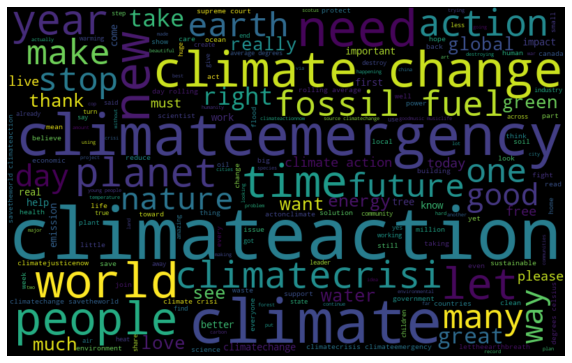

In [28]:
#creating word cloud for words found 
all_words = ' '.join([text for text in df_clean['remove_short']])

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Word cloud for positive label

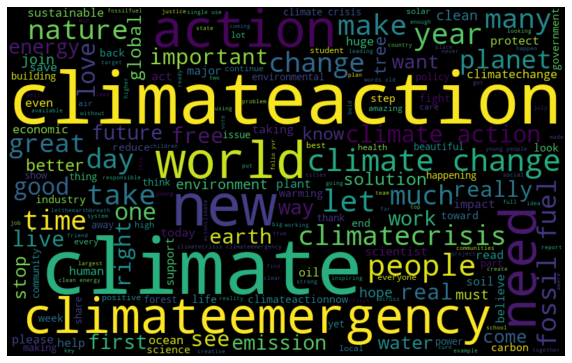

In [29]:
normal_words =''.join([text for text in df_clean['remove_short'][df_clean['label'] == 'pos']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Word cloud for negative label

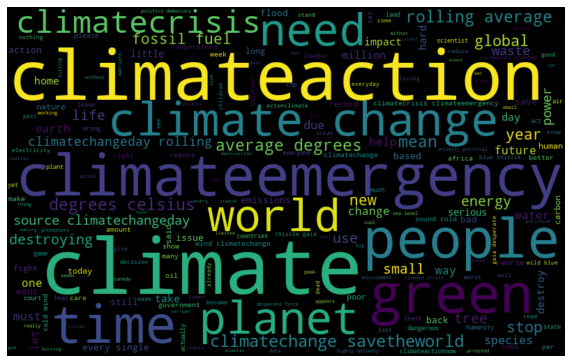

In [30]:
#negative
normal_words =''.join([text for text in df_clean['remove_short'][df_clean['label'] == 'neg']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [31]:
lemmatizer = WordNetLemmatizer() 
corpus = [] 
messages = df_clean.lemmatized.tolist() 
 
for i in range(0, len(messages)): 
    message = re.sub('[^a-zA-Z]', ' ', str(messages[i])) 
    message = message.lower() 
    message = message.split() 
     
    message = [lemmatizer.lemmatize(word) for word in message if not word in stopwords.words('english')] 
    message = ' '.join(message) 
    corpus.append(message) 


# Feature Extraction using Tf-IDF Vectorizer

In [32]:
# Creating the TF-IDF model 
from sklearn.feature_extraction.text import TfidfVectorizer 
vectorizer = TfidfVectorizer() 
vectorizer = vectorizer.fit(corpus) 
X = vectorizer.transform(corpus).toarray() 
X.shape

(1871, 4371)

In [33]:
print(vectorizer.transform(corpus))

  (0, 4219)	0.34377004230945063
  (0, 2960)	0.3417803764411975
  (0, 2947)	0.39993777147712595
  (0, 1426)	0.39134674028369415
  (0, 1225)	0.475345053674438
  (0, 1193)	0.475345053674438
  (1, 3639)	0.49676113054822
  (1, 3605)	0.42697832425645255
  (1, 2402)	0.4544652416410616
  (1, 1889)	0.35944099260764945
  (1, 690)	0.2267247581113791
  (1, 615)	0.30278005261474505
  (1, 45)	0.3034823397875305
  (2, 3461)	0.6781617835945342
  (2, 3215)	0.495204175498113
  (2, 2325)	0.5430188024747525
  (3, 4032)	0.3310055606663934
  (3, 4000)	0.3242973161839592
  (3, 3949)	0.2927177715667777
  (3, 3936)	0.25789599177316125
  (3, 2920)	0.3939408757711921
  (3, 2353)	0.3735714403835568
  (3, 2325)	0.2712441772482103
  (3, 1552)	0.3939408757711921
  (3, 210)	0.3310055606663934
  :	:
  (1867, 2107)	0.41237247623521156
  (1867, 1835)	0.37592146431038875
  (1867, 464)	0.3139387158669854
  (1867, 307)	0.36418685948471397
  (1868, 3949)	0.30102365349827126
  (1868, 3913)	0.3274142805850661
  (1868, 3859)	0

# Feature Extraction using Tf-IDF Transformer

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer

In [35]:
#instantiate CountVectorizer() 
cv=CountVectorizer() 
# this steps generates word counts for the words in your docs 
word_count_vector=cv.fit_transform(corpus)

In [36]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(word_count_vector)

TfidfTransformer()

In [37]:
#calculate idf_weights
pd.set_option('display.max_columns', None)
# print idf values 
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"]) 
# sort ascending
df_idf.sort_values(by=['idf_weights'])


C:\Users\lutaz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,idf_weights
climate,2.844403
climateaction,3.009310
climateemergency,3.319827
climatecrisis,3.738972
climatechange,3.781172
...,...
impli,7.841615
implication,7.841615
impossible,7.841615
hysteric,7.841615


In [38]:
vect= TfidfVectorizer(max_features=100).fit(df_clean.lemmatized)
X_txt=vect.transform(df_clean.lemmatized)

In [39]:
X_df = pd.DataFrame(X_txt.toarray(), columns= vect.get_feature_names())

C:\Users\lutaz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [40]:
X_df

,act,action,air,average,bad,carbon,change,city,clean,climate,climateaction,climateactionnow,climatechange,climatecrisis,climateemergency,come,community,country,create,crisis,day,destroy,earth,emission,energy,environment,even,every,fight,fossil,free,fuel,future,gas,get,global,go,good,great,green,happen,help,high,impact,important,issue,know,lead,let,life,like,live,look,love,make,many,mean,much,must,nature,need,new,oil,one,people,plan,planet,plant,plastic,power,protect,real,really,reduce,right,save,savetheworld,say,scientist,see,single,solar,solution,source,stop,take,time,today,tree,use,vote,want,waste,water,way,well,work,world,would,year
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.705052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.709156,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.502755,0.0,0.0,0.0,0.0,0.501592,0.0,0.0,0.375597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.595458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1866,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1867,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

C:\Users\lutaz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


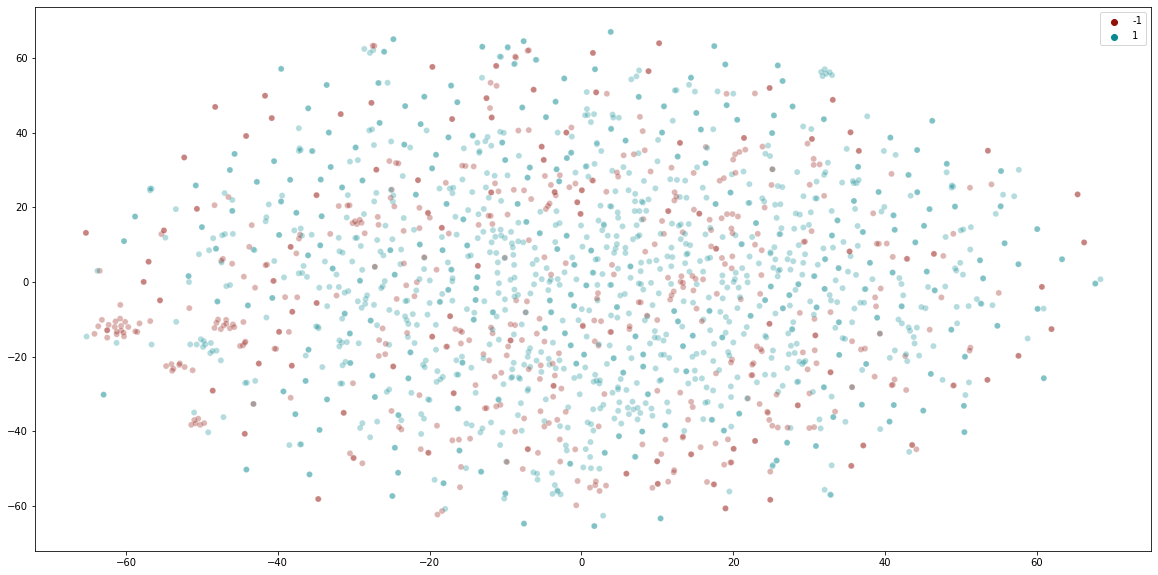

In [41]:
y = df_clean['sentiment'].replace(0, -1) 
 
from sklearn.manifold import TSNE 
import seaborn as sns 
labels = y.to_list() 
tsne_results = TSNE(n_components=2,init='random',random_state=0, perplexity=40).fit_transform(X) 
plt.figure(figsize=(20,10)) 
palette = sns.hls_palette(2, l=.3, s=.9) 
sns.scatterplot( 
    x=tsne_results[:,0], y=tsne_results[:,1], 
    hue=labels, 
    palette= palette, 
    legend="full", 
    alpha=0.3 
) 
plt.show()

# Split to train and test data

In [42]:
# Train Test Split 
 
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 0)

In [43]:
print("shape of input - training set", X_train.size)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", X_test.shape)
print("shape of output - testing set", y_test.shape)

shape of input - training set 6539016
shape of output - training set (1496,)
shape of input - testing set (375, 4371)
shape of output - testing set (375,)


# SVM Model

In [44]:
from collections import Counter 
print("Before SMOTE :" , Counter(y_train)) 
 
sm = SMOTE(random_state=2) 
X_train, y_train = sm.fit_resample(X_train, y_train.ravel()) 
print("After SMOTE :" , Counter(y_train))

Before SMOTE : Counter({1: 1027, -1: 469})
After SMOTE : Counter({-1: 1027, 1: 1027})


In [45]:
k_value = np.array(X_train @ X_train.T + np.identity(len(y_train))*1e-12) 
pd.set_option('display.max_columns', None)
k_value

array([[1.        , 0.        , 0.        , ..., 0.07471615, 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.0681259 ,
        0.03853394],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.07471615, 0.        , 0.        , ..., 0.64945656, 0.        ,
        0.        ],
       [0.        , 0.0681259 , 0.        , ..., 0.        , 0.63178164,
        0.        ],
       [0.        , 0.03853394, 0.        , ..., 0.        , 0.        ,
        0.68482173]])

In [46]:
#  check PSD
np.linalg.cholesky(k_value)

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 7.47161478e-02,  0.00000000e+00,  0.00000000e+00, ...,
         1.24410253e-06,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  6.81259001e-02,  0.00000000e+00, ...,
         1.06596945e-12,  1.09194231e-06,  0.00000000e+00],
       [ 0.00000000e+00,  3.85339450e-02,  0.00000000e+00, ...,
        -3.70580822e-14, -5.02160834e-13,  1.14222655e-06]])

In [47]:
import cvxpy as cp 

In [48]:
alpha = cp.Variable(shape=y_train.shape) # Create optimization variables. 
 
beta = cp.multiply(alpha, y_train) # to simplify notation 
 
K = cp.Parameter(shape=k_value.shape, PSD=True, value=k_value) 
 
# objective function 
obj = .5 * cp.quad_form(beta, K) - np.ones(alpha.shape).T @ alpha 
 
# constraints 
const = [np.array(y_train.T) @ alpha == 0, 
        -alpha <= np.zeros(alpha.shape), 
        alpha <= 10*np.ones(shape=alpha.shape)] 
prob = cp.Problem(cp.Minimize(obj), const) 
result = prob.solve()

C:\Users\lutaz\AppData\Local\Programs\Python\Python310\lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:178: UserWarning: You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Discplined Parametrized Programming, at
	https://www.cvxpy.org/tutorial/advanced/index.html#disciplined-parametrized-programming
  warnings.warn(dpp_error_msg)


In [49]:
w = np.multiply(y_train, alpha.value).T @ X_train

In [50]:
S = (alpha.value > 1e-4).flatten() 
b = y_train[S] - X_train[S] @ w 
b = b[0] 
b = np.mean(b)  

In [51]:
def classify(x): 
    result = w @ x + b 
    return np.sign(result)

# Evaluate the algorithm performance

In [52]:
correct = 0 
incorrect = 0 
predictions = [] 
for i in X_test: 
     
    my_svm = classify(i) 
     
    predictions.append(my_svm) 
     
predictions = np.array(predictions)

In [53]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix 
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          -1       0.92      0.81      0.86       129
           1       0.90      0.96      0.93       246

    accuracy                           0.91       375
   macro avg       0.91      0.88      0.90       375
weighted avg       0.91      0.91      0.91       375



<AxesSubplot:>

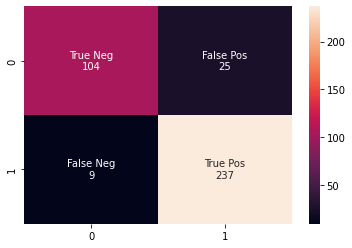

In [54]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']
cf_matrix = metrics.confusion_matrix(y_test, predictions)
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
# group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='')

In [55]:
accuracy2_1g= accuracy_score(y_test,predictions)
print("Accuracy using 1-gram SVM Classifier on Test data: {:.2f}%\n\n".format(accuracy2_1g*100))

Accuracy using 1-gram SVM Classifier on Test data: 90.93%




In [56]:
import sklearn.metrics as metrics 
# calculate the fpr and tpr for all thresholds of the classification 
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions) 
roc_auc = metrics.auc(fpr, tpr)

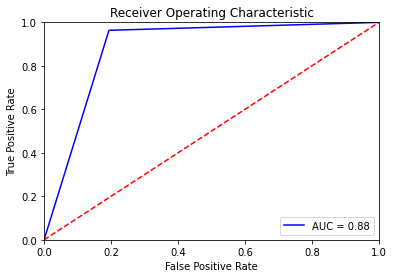

In [57]:
import matplotlib.pyplot as plt 
plt.title('Receiver Operating Characteristic') 
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc) 
plt.legend(loc = 'lower right') 
plt.plot([0, 1], [0, 1],'r--') 
plt.xlim([0, 1]) 
plt.ylim([0, 1]) 
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate') 
plt.show()

# GUI

In [58]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import TweetTokenizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score

In [59]:
data = pd.read_csv(r"C:\Users\lutaz\Desktop\fyp complete\new labelled data for gui.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\lutaz\\Desktop\\fyp complete\\new labelled data for gui.csv'

In [ ]:
data_clean = data.loc[: , ['remove_short', 'sentiment'] ] 

In [ ]:
data_clean.head()

In [ ]:
train, test = train_test_split(data_clean, test_size=0.2, random_state=1)
X_train = train['remove_short'].values
X_test = test['remove_short'].values
y_train = train['sentiment']
y_test = test['sentiment']

In [ ]:
def tokenize(text): 
    tknzr = TweetTokenizer()
    return tknzr.tokenize(text)

def stem(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

en_stopwords = set(stopwords.words("english")) 

vectorizer = CountVectorizer(
    analyzer = 'word',
    tokenizer = tokenize,
    lowercase = True,
    ngram_range=(1, 1),
    stop_words = en_stopwords)

In [ ]:
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
np.random.seed(1)

pipeline_svm = make_pipeline(vectorizer, 
                            SVC(probability=True, kernel="linear", class_weight="balanced"))

grid_svm = GridSearchCV(pipeline_svm,
                    param_grid = {'svc__C': [0.01, 0.1, 1]}, 
                    cv = kfolds,
                    scoring="roc_auc",
                    verbose=1,   
                    n_jobs=-1) 

grid_svm.fit(X_train, y_train)
grid_svm.score(X_test, y_test)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from tkinter import *
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tkinter import *
from PIL import ImageTk, Image  

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from tkinter import *
# from sklearn.metrics import classification_report
# from sklearn.metrics import plot_confusion_matrix
# from PIL import ImageTk, Image  

# def exit():
#     gui.destroy()
    
# def clearAll() :
#     overallField.delete(0, END)
#     textArea.delete(1.0, END)

# def detect_sentiment():
 
#     # get a whole input content from text box
#     sentiment= " "
#     sentence = textArea.get("1.0", "end")
#     sentiment_dict=grid_svm.predict([sentence])
#     string= str(sentiment_dict)
    
#     if string == "[0]" :
#            sentiment = "Not Aware" 
    
#     elif string == "[1]":
#            sentiment = "Aware" 
    
#     else:
#            sentiment= "Failed to Classify"
        
#     overallField.insert(20, sentiment)
    
# def report_results_acc(model, X, y):
#     pred_proba = model.predict_proba(X)[:, 1]
#     pred = model.predict(X)        
#     acc =  round(accuracy_score(y, pred)*100, 4)
#     return acc

# def report_results_f1(model, X, y):
#     pred_proba = model.predict_proba(X)[:, 1]
#     pred = model.predict(X)        
#     f1 =  round((f1_score(y, pred)*100), 4)
#     return f1

# def report_results_prec(model, X, y):
#     pred_proba = model.predict_proba(X)[:, 1]
#     pred = model.predict(X)  
#     prec = round((precision_score(y, pred)*100), 4)
#     return prec

# def report_results_recall(model, X, y):
#     pred_proba = model.predict_proba(X)[:, 1]
#     pred = model.predict(X)  
#     rec = round((recall_score(y, pred)*100), 4)
#     return rec
    
# def openNewWindow():
#     newWindow = Toplevel(gui)
    
#     newWindow.geometry('1000x650')
#     newWindow.config(background =  "honeydew3")
    
#     Label(newWindow, text ="Report Result", font = "lucida 32", bg="honeydew3").pack()
    
#     accuracy= Label (newWindow, text= "Accuracy : ", bg="pale green", font = "lucida 20" )
#     f1= Label (newWindow, text ="F1 Score : ", bg="pale green", font = "lucida 20" )
#     precision= Label(newWindow, text = "Precision : ", bg="pale green", font = "lucida 20")
#     recall= Label (newWindow, text = "Recall : ", bg="pale green", font = "lucida 20")
    
#     accuracyField= Label(newWindow, text = str(report_results_acc(grid_svm.best_estimator_, X_test, y_test)), 
#                          font = "lucida 20" ) 
#     f1Field= Label(newWindow, text = str(report_results_f1(grid_svm.best_estimator_, X_test, y_test)), 
#                    font = "lucida 20" ) 
#     precisionField= Label(newWindow, text = str(report_results_prec(grid_svm.best_estimator_, X_test, y_test)), 
#                           font = "lucida 20" ) 
#     recallField= Label(newWindow, text = str(report_results_recall(grid_svm.best_estimator_, X_test, y_test)), 
#                        font = "lucida 20" ) 
    
#     accuracy.pack(pady = 4)
#     accuracyField.pack(pady = 5)
    
#     f1.pack(pady = 7)
#     f1Field.pack(pady = 9)
    
#     precision.pack(pady = 10)
#     precisionField.pack(pady = 11)
    
#     recall.pack(pady = 13)
#     recallField.pack(pady = 14)
    
# # Driver Code
# if __name__ == "__main__" :
     
#     # Create a GUI window
#     gui = Tk()
     
#     # Set the background colour of GUI window
#     gui.config(background =  "light blue")

#     # set the name of tkinter GUI window
#     gui.title("Public Sentiment on Awareness of Climate Change based on SVM")
     
#      # Set the configuration of GUI window
#     gui.geometry('1000x650')

#     img =Image.open(r"C:\Users\lutaz\Desktop\fyp complete\bg interface.png")
#     bg = ImageTk.PhotoImage(img)
    
#     # Add image
#     label = Label(gui, image=bg)
#     label.place(x = 0,y = 0)
    
    
#     #create Area text
#     titleText=Label(gui, text = "Public Sentiment on Awareness of Climate Change",fg = "White",
#                     bg = "#222831", font = "lucida 32")
#     enterText = Label(gui, text = "Enter tweets",fg = "White",bg = "#222831", font = "lucida 16")
#     textArea = Text(gui, height = 5, width = 42, font = "lucida 13")
#     check = Button(gui, text = "Check the Tweets Sentiment", fg = "White",
#                          bg = "green",font= "lucida 13", command = detect_sentiment)
    

#     overall = Label(gui, text = "The tweet is categorized as: ",
#                                            bg = "#222831",font= "lucida 13",fg="White")
#     # create a text entry box 
#     overallField = Entry(gui, font= "lucida 13")
    
    
#     clear = Button(gui, text = "Clear",
#                       fg = "White",bg = "#222831", font= "lucida 13", command = clearAll)
    
#     Exit = Button(gui, text = "Exit", fg="White",
#                         bg = "firebrick4" , font= "lucida 13", command = exit)
    
#     ReportResult = Button (gui, text="Check Overall Classifier result", font= "lucida 13", fg="White",
#                           bg= "HotPink4", command = openNewWindow)    
    
#     blank = Label (gui, text="\n", bg=None)
    
#     titleText.pack(pady= 5)
#     enterText.pack(pady = 10)
#     textArea.pack(pady = 12)
#     check.pack(pady = 13)
#     overall.pack(pady = 15)
#     overallField.pack(pady = 15)
#     clear.pack(pady=17)
#     ReportResult.pack(pady=19)
#     Exit.pack(pady=20)

#   # start the GUI
#     gui.mainloop()


In [ ]:
def exit():
    gui.destroy()

def clearAll() :
   
    overallField.delete(0, END)
 
    textArea.delete(1.0, END)
     
def detect_sentiment():
 
    sentence = textArea.get("1.0", "end")
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
 
     
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] > 0.05 :
        string = "Aware"
 
    elif sentiment_dict['compound'] < - 0.05 :
        string = "Not Aware"
      
 
    else :
        string = "Aware"
 
    overallField.insert(10, string)
def openNewWindow():
    newWindow = Toplevel(gui)
    
    newWindow.geometry('1000x650')
    newWindow.config(background =  "honeydew3")
    
    Label(newWindow, text ="Report Result", font = "lucida 32", bg="honeydew3").pack()
    
    accuracy= Label (newWindow, text= "Accuracy : ", bg="pale green", font = "lucida 20" )
    f1= Label (newWindow, text ="F1 Score : ", bg="pale green", font = "lucida 20" )
    precision= Label(newWindow, text = "Precision : ", bg="pale green", font = "lucida 20")
    recall= Label (newWindow, text = "Recall : ", bg="pale green", font = "lucida 20")
    
    accuracyField= Label(newWindow, text = str(round(accuracy_score(y_test,predictions)*100,4)), 
                         font = "lucida 20" ) 
    f1Field= Label(newWindow, text = str(round(f1_score(y_test,predictions,  average='binary')*100,4)), 
                   font = "lucida 20" ) 
    precisionField= Label(newWindow, text = str(round(precision_score(y_test,predictions, average='binary')*100,4)), 
                          font = "lucida 20" ) 
    recallField= Label(newWindow, text = str(round(recall_score(y_test,predictions,  average='binary')*100,4)), 
                       font = "lucida 20" ) 
    
    Exitnw= Button(gui, text = "Exit", fg="White",
                        bg = "firebrick4" , font= "lucida 13", command = exitnewWindow)
    
    accuracy.pack(pady = 4)
    accuracyField.pack(pady = 5)
    
    f1.pack(pady = 7)
    f1Field.pack(pady = 9)
    
    precision.pack(pady = 10)
    precisionField.pack(pady = 11)
    
    recall.pack(pady = 13)
    recallField.pack(pady = 14)
    
    Exitnw.pack(pady=17)

# Driver Code
if __name__ == "__main__" :
     
    gui = Tk()
     
    # Set the background colour of GUI window
    gui.config(background =  "light blue")
 
    # set the name of tkinter GUI window
    gui.title("Public Sentiment on Awareness of Climate Change based on SVM")
 
    # Set the configuration of GUI window
    gui.geometry('1000x650')
    
#     img =Image.open(r"C:\Users\lutaz\Desktop\fyp complete\bg interface.png")
#     bg = ImageTk.PhotoImage(img)
    
#     # Add image
#     label = Label(gui, image=bg)
#     label.place(x = 0,y = 0)
 
     #create Area text
    titleText=Label(gui, text = "Public Sentiment on Awareness of Climate Change",fg = "White",
                    bg = "#222831", font = "lucida 32")
    enterText = Label(gui, text = "Enter tweets",fg = "White",bg = "#222831", font = "lucida 16")
    textArea = Text(gui, height = 5, width = 42, font = "lucida 13")
    check = Button(gui, text = "Check the Tweets Sentiment", fg = "White",
                         bg = "green",font= "lucida 13", command = detect_sentiment)
    

    overall = Label(gui, text = "The tweet is categorized as: ",
                                           bg = "#222831",font= "lucida 13",fg="White")
    # create a text entry box 
    overallField = Entry(gui, font= "lucida 13")
    
    
    clear = Button(gui, text = "Clear",
                      fg = "White",bg = "#222831", font= "lucida 13", command = clearAll)
    
    Exit = Button(gui, text = "Exit", fg="White",
                        bg = "firebrick4" , font= "lucida 13", command = exit)
    
    ReportResult = Button (gui, text="Check Overall Classifier result", font= "lucida 13", fg="White",
                          bg= "HotPink4", command = openNewWindow)
        
    titleText.pack(pady= 5)
    enterText.pack(pady = 10)
    textArea.pack(pady = 12)
    check.pack(pady = 13)
    overall.pack(pady = 15)
    overallField.pack(pady = 15)
    clear.pack(pady=17)
    ReportResult.pack(pady=19)
    Exit.pack(pady=20)
    
    # start the GUI
    gui.mainloop()